## Relatório de Análise VIII

# Identificando e Removendo Outliers

In [4]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14, 6))

In [5]:
dados = pd.read_csv('db/aluguel_residencial.csv', sep = ';')

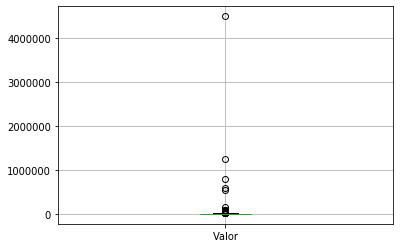

In [6]:
dados.boxplot(['Valor'])

In [7]:
dados[dados['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
7629,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
10636,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Casa
12661,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
13846,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
15520,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


In [8]:
valor = dados['Valor']

<img src='BoxPlot.png'>

In [13]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [14]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)

In [15]:
dados_new = dados[selecao]

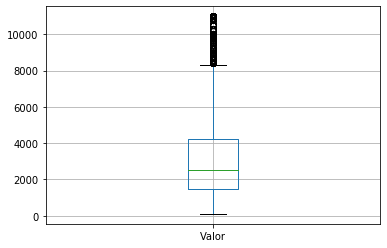

In [16]:
dados_new.boxplot(['Valor'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0C970530>]],
      dtype=object)

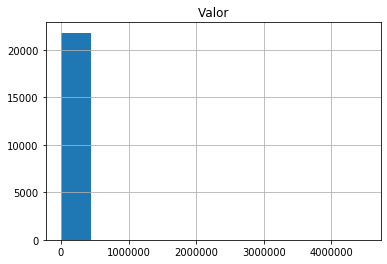

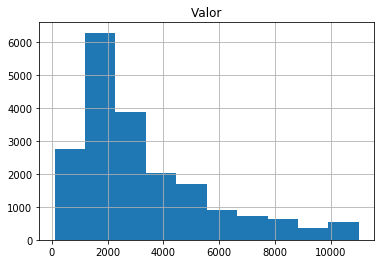

In [18]:
dados.hist('Valor')
dados_new.hist('Valor')